## Loan Prediction using Machine Learning
The idea behind this ML project is to build a model that will classify how much loan the user can take.

### There are 13 attributes in each case of the dataset. They are:
* Loan_ID
* Gender
* Married
* Dependents
* Education
* Self Employed
* Applicant Income
* Coapplicant Income
* Loan Amount
* Loan Amount Term
* Credit History
* Property Area
* Loan Status

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Import dataset using pandas.

In [13]:
dataset = pd.read_csv('datasets_train.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Clean the data

Encoding - There are a few categorical columns. Some of them have string as type of values. Convert they to be useful in Machine Learning process.

In [14]:
dataset['Married'] = dataset['Married'].map({'No': 0, 'Yes': 1})
dataset['Dependents'] = dataset['Dependents'].map({'0': '0 Dependents', '1': '1 Dependents', '2': '2 Dependents', '3+': '3+ Dependents'})
dataset['Education'] = dataset['Education'].map({'Not Graduate': 0, 'Graduate': 1})
dataset['Self_Employed'] = dataset['Self_Employed'].map({'No': 0, 'Yes': 1})
dataset['Loan_Status'] = dataset['Loan_Status'].map({'N': 0, 'Y': 1})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='', columns = ['Gender', 'Dependents', 'Property_Area'])
dataset.head()

,Loan_ID,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,0 Dependents,1 Dependents,2 Dependents,3+ Dependents,Rural,Semiurban,Urban
0,LP001002,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,0,1,1,0,0,0,0,0,1
1,LP001003,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,0,0,1,0,0
2,LP001005,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,0,0,1
3,LP001006,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,1,1,0,0,0,0,0,1
4,LP001008,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,0,0,1


Check if the dataset contains unknown values.

In [15]:
for i in dataset.columns:
    # count number of rows with missing values
    n_miss = dataset[i].isna().sum()
    perc = n_miss / dataset.shape[0] * 100
    print('> %d (%.1f%%) missing in %s column' % (n_miss, perc, i))

> 0 (0.0%) missing in Loan_ID column
> 3 (0.5%) missing in Married column
> 0 (0.0%) missing in Education column
> 32 (5.2%) missing in Self_Employed column
> 0 (0.0%) missing in ApplicantIncome column
> 0 (0.0%) missing in CoapplicantIncome column
> 22 (3.6%) missing in LoanAmount column
> 14 (2.3%) missing in Loan_Amount_Term column
> 50 (8.1%) missing in Credit_History column
> 0 (0.0%) missing in Loan_Status column
> 0 (0.0%) missing in Female column
> 0 (0.0%) missing in Male column
> 0 (0.0%) missing in 0 Dependents column
> 0 (0.0%) missing in 1 Dependents column
> 0 (0.0%) missing in 2 Dependents column
> 0 (0.0%) missing in 3+ Dependents column
> 0 (0.0%) missing in Rural column
> 0 (0.0%) missing in Semiurban column
> 0 (0.0%) missing in Urban column


There are very few input data and that is why I will not drop rows with NaN values. To predict values for their, I will use k-Nearest Neighbour algorithm.

In [16]:
index = dataset.pop('Loan_ID')
k = [i for i in dataset.columns]
# define imputer
imputer = KNNImputer(n_neighbors=5)
# fit on the dataset
imputer.fit(dataset)
# transform the dataset
dataset = pd.DataFrame(imputer.transform(dataset))
dataset.columns = k
dataset = dataset.set_index(index)
dataset.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,0 Dependents,1 Dependents,2 Dependents,3+ Dependents,Rural,Semiurban,Urban
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,0.0,1.0,0.0,5849.0,0.0,147.8,360.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001003,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
LP001005,1.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001006,1.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001008,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
dataset.isna().sum()

Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Female               0
Male                 0
0 Dependents         0
1 Dependents         0
2 Dependents         0
3+ Dependents        0
Rural                0
Semiurban            0
Urban                0
dtype: int64

### Split dataset_train to train and test set

In [18]:
train_dataset, test = train_test_split(dataset, test_size=0.2)
print(len(train_dataset), 'train examples')
print(len(test), 'test examples')

491 train examples
123 test examples


### Inspect the overall statistics of training set

In [20]:
train_stats = train_dataset.describe()
train_stats.pop('Loan_Status')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Married,491.0,0.652546,0.475790,0.0,0.0,1.0,1.0,1.0
Education,491.0,0.808554,0.393841,0.0,1.0,1.0,1.0,1.0
Self_Employed,491.0,0.132790,0.333877,0.0,0.0,0.0,0.0,1.0
ApplicantIncome,491.0,5614.331976,6613.034381,210.0,2897.5,3859.0,5929.0,81000.0
CoapplicantIncome,491.0,1720.201466,3173.361382,0.0,0.0,1255.0,2391.5,41667.0
LoanAmount,491.0,151.123829,90.179926,9.0,102.0,130.0,171.1,700.0
Loan_Amount_Term,491.0,343.102240,60.096822,12.0,360.0,360.0,360.0,480.0
Credit_History,491.0,0.844807,0.348215,0.0,1.0,1.0,1.0,1.0
Female,491.0,0.183299,0.387306,0.0,0.0,0.0,0.0,1.0
Male,491.0,0.790224,0.407564,0.0,1.0,1.0,1.0,1.0


### Split features from labels
Separate the target value from the features. This label is the value that you will train the model to predict.

In [21]:
train_labels = train_dataset.pop('Loan_Status')
test_labels = test.pop('Loan_Status')

### Normalize the data

In [22]:
def norm(x):
    return (x - train_stats['min']) / (train_stats['max'] - train_stats['min'])
normed_train_data = norm(train_dataset)
normed_test_data = norm(test)

### Build the model
I will use a Sequential model with densely connected hidden layers.

In [23]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=[len(normed_train_data.keys())]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


lr = tf.keras.optimizers.schedules.InverseTimeDecay(0.001,
                                                    decay_steps=10000,
                                                    decay_rate=1,
                                                    staircase=False) 

optimizer = tf.keras.optimizers.Adam(lr)

model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


### Train the model
EarlyStopping is used to automatically stop training when the validation score does not improve.

In [24]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, validation_split = 0.2, epochs=1000, callbacks=early_stop)

Epoch 1/1000
13/13 [==============================] - 1s 41ms/step - loss: 0.6504 - accuracy: 0.6531 - val_loss: 0.6000 - val_accuracy: 0.7172
Epoch 2/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.6128 - accuracy: 0.6811 - val_loss: 0.5784 - val_accuracy: 0.7172
Epoch 3/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.6023 - accuracy: 0.6811 - val_loss: 0.5727 - val_accuracy: 0.7172
Epoch 4/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.5924 - accuracy: 0.6811 - val_loss: 0.5703 - val_accuracy: 0.7273
Epoch 5/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.5809 - accuracy: 0.6811 - val_loss: 0.5605 - val_accuracy: 0.7273
Epoch 6/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.5703 - accuracy: 0.6939 - val_loss: 0.5595 - val_accuracy: 0.7374
Epoch 7/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.5637 - accuracy: 0.7194 - val_loss: 0.5530 - val_accuracy: 0.7475

Visualize the model's training progress using the stats stores in the 'history' object.

In [25]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy: ", accuracy)

4/4 - 0s - loss: 0.5355 - accuracy: 0.7805
Accuracy:  0.7804877758026123


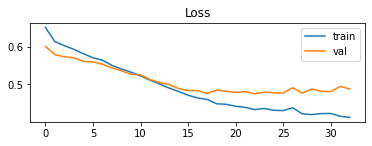

In [26]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

### Make predictions
The test set is used to predict Loan_Status class from data which did not use when training the model.

In [27]:
test_predictions = model.predict(normed_test_data)
i = np.random.randint(len(normed_test_data))
print('No. of example: {}'.format(i))
print('Predicted value: {}'.format(float(test_predictions[i])))
print('Predicted class: {}'.format(int(np.round(test_predictions[i]))))
print('True class: {}'.format(int(test_labels.iloc[i])))


No. of example: 9
Predicted value: 0.0811329185962677
Predicted class: 0
True class: 0
